## Guilherme Zuccolotto Soriano

### Resumo

<p>Analisando os dados referentes aos filmes do MovieLens, podemos tirar algumas conclusões sobre filmes e comportamento de categorias dos filmes.</p>
<p>Temos alguns comportamentos diferentes de acordo com <b>categorias</b> e <b>ano de lançamento</b>.</p>
<p>Podemos perceber que algumas categorias como <b>Ação</b> que possuem uma aceitação maior por parte do publico em receberem votação. Seriam esses filmes mais assistidos? Não conseguimos aferir, mas podemos notar que são mais votados que outros filmes, ou seja, existe uma correlação entre o <b> Tota de Votos </b> e as <b> Notas médias </b> dos filmes. Isso poderia nos auxiliar na escolha de tipo de filme que poderiamos produzir, buscando determinadas métricas. Como a nota média possui certa correlação com o total de votos</p>
<p>Percebemos que algumas categorias estão mais correlacionadas do que outras, o que significa que algumas categorias de filmes, como <b> Ação </b> e  <b> Ficção </b>, tendem a aparecere juntos. ou seja, temos um percentual de filmes com ambas as categorias.</p>

<p> Verificamos também que existe uma década, <b> 90' </b> com mais <b> filmes de ação </b>, e que como estes filmes tem mais votos, e uma média maior, temos a percepção que durante essa década os filmes são melhores.
<p> Notamos também que as décadas entre <b> 70' e 90'</b> temos uma média de votos maior por filme.


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [66]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.0.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\seaborn-0.10.0.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.

ERROR: pmdarima 1.5.3 has requirement scipy>=1.3.2, but you'll have scipy 1.2.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scipy-1.4.1.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import plotly.express as px

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.1
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [68]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
filmes.columns = (['filmeId', 'titulo','generos'])
filmes = filmes.set_index('filmeId')

In [69]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [70]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [71]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [72]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = (['usuarioId','filmeId','nota','momento'])

In [73]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [74]:
filmes['nota_media'] = (notas.groupby(['filmeId']).mean()['nota'])


In [75]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [76]:
# solução para calcular o total de votos por filme

filmes['total_de_votos'] = notas.groupby(['filmeId']).count()['nota']
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [77]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.loc[filmes['total_de_votos'] >= 50]

In [78]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Notas médias dos filmes com mais de 50 avaliações')

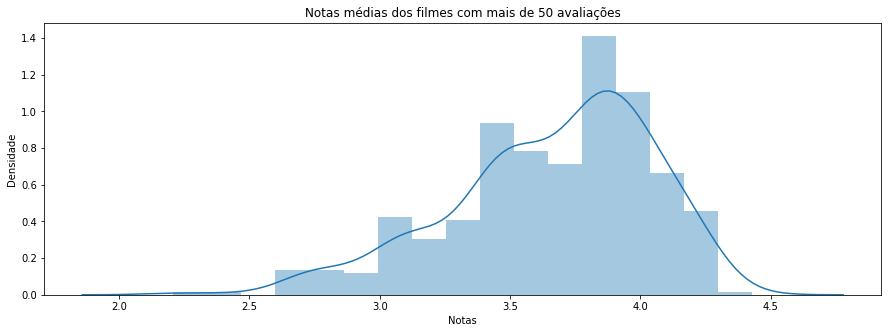

In [79]:
# solução histograma
# solução histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.distplot(filmes.nota_media)
ax.set(xlabel='Notas', ylabel='Densidade')
ax.set_title('Notas médias dos filmes com mais de 50 avaliações')


Text(0.5, 1.0, 'Notas médias acumuladas dos filmes com mais de 50 avaliações')

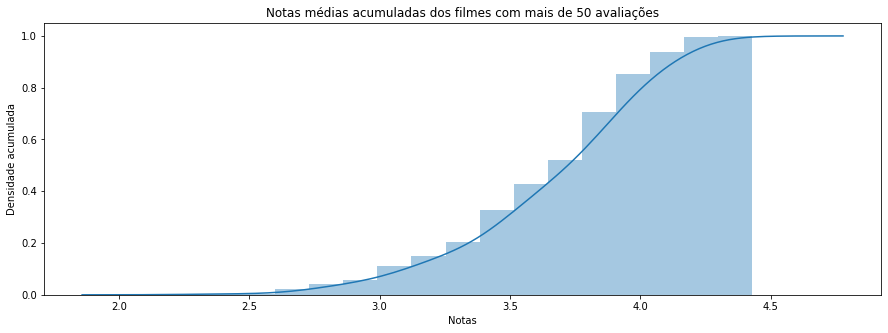

In [80]:
# solução cumulativa
plt.figure(figsize=(15,5))
ax = sns.distplot(filmes.nota_media,
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True})
ax.set(xlabel='Notas', ylabel='Densidade acumulada')
ax.set_title('Notas médias acumuladas dos filmes com mais de 50 avaliações')

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Quantidade de Votos filmes com mais de 50 avaliações')

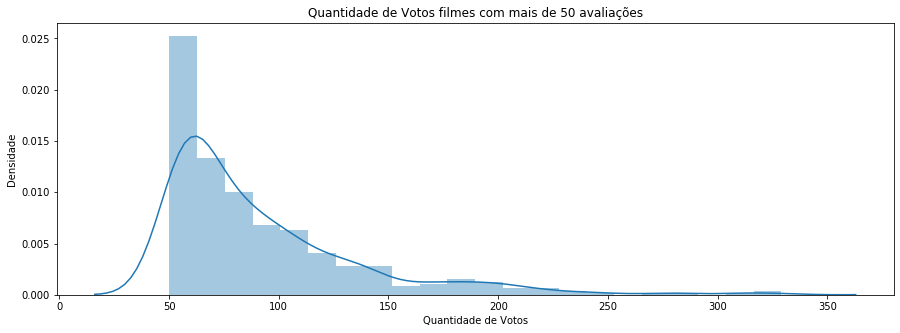

In [81]:
# solução histograma
plt.figure(figsize=(15,5))
ax = sns.distplot(filmes.total_de_votos)
ax.set(xlabel='Quantidade de Votos', ylabel='Densidade')
ax.set_title('Quantidade de Votos filmes com mais de 50 avaliações')

Text(0.5, 1.0, 'Quantidade de Votos filmes com mais de 50 avaliações')

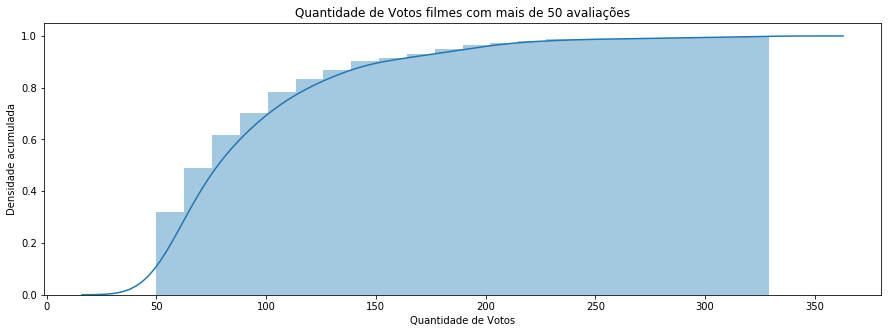

In [82]:
# solução cumulativa
plt.figure(figsize=(15,5))
ax = sns.distplot(filmes.total_de_votos,
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True})
ax.set(xlabel='Quantidade de Votos', ylabel='Densidade acumulada')
ax.set_title('Quantidade de Votos filmes com mais de 50 avaliações')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [83]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(q=0.8)

In [84]:
print(f"20 porcento dos filmes tem nota maior que de {nota_limite_dos_20_porcento}"  )

20 porcento dos filmes tem nota maior que de 3.992833035537026


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [85]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [86]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [87]:
# solução
generos.sum()

Action         164
Adventure      132
Animation       32
Children        47
Comedy         181
Crime           87
Documentary      2
Drama          166
Fantasy         66
FilmNoir         4
Horror          26
IMAX            28
Musical         21
Mystery         38
Romance         85
SciFi           92
Thriller       121
War             19
Western         12
dtype: int64

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [88]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False)[:5]

In [89]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [90]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [91]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [92]:
# solução

result = pd.concat([generos.sum(), votos_por_genero_por_filme.sum()], axis=1, keys=['quantidade_filmes', 'votos_por_filme'])
result.index.name='generos'
result

,quantidade_filmes,votos_por_filme
generos,,
Action,164,15734.0
Adventure,132,13117.0
Animation,32,3066.0
Children,47,4331.0
Comedy,181,15330.0
Crime,87,8649.0
Documentary,2,108.0
Drama,166,15445.0
Fantasy,66,5993.0


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [93]:
# solucao código

result['votos_por_genero'] = result.votos_por_filme/result.quantidade_filmes
result = result.sort_values("votos_por_genero", ascending=False)
result

,quantidade_filmes,votos_por_filme,votos_por_genero
generos,,,
War,19,2113.0,111.210526
Crime,87,8649.0,99.413793
Adventure,132,13117.0,99.371212
Thriller,121,11907.0,98.404959
SciFi,92,8989.0,97.706522
Action,164,15734.0,95.939024
Animation,32,3066.0,95.812500
Drama,166,15445.0,93.042169
Children,47,4331.0,92.148936


Text(0, 0.5, 'Votos')

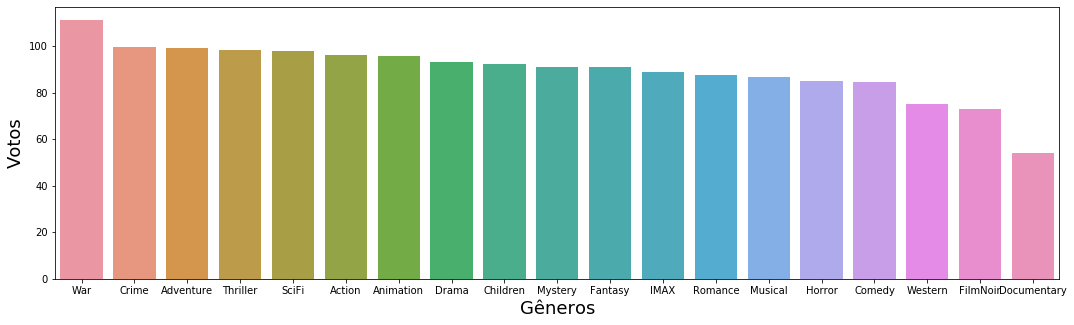

In [94]:
# solução com visualização 
plt.figure(figsize=(18,5))
sns.barplot(x = result.index, y = ("votos_por_genero"), data = result)
plt.xlabel('Gêneros', fontsize=18)
plt.ylabel('Votos', fontsize=18)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
Verificamos que os filmes com a categoria Action está entre as 5 categorias com mais filmes, tendo a maior quantidade de votos, enquanto a categoria war por mais que esteja entre as categorias com menos filmes, tem a maior quantidade de votos por filme dentre os gêneros.    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

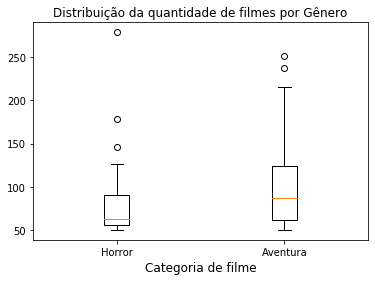

In [95]:
# solução:
Horror = votos_por_genero_por_filme.query("Horror > 0").Horror
Aventura = Acao = votos_por_genero_por_filme.query("Adventure > 0").Adventure
data = [Horror, Aventura]
fig, ax = plt.subplots()
ax.set_title('Distribuição da quantidade de filmes por Gênero')
ax.boxplot(data, labels=['Horror','Aventura'])
plt.xlabel("Categoria de filme", fontsize=12)
plt.show()

# Separei as categorias e fiz um filtro para votos > 0.


## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

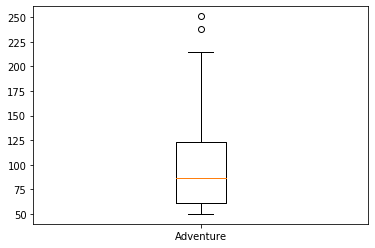

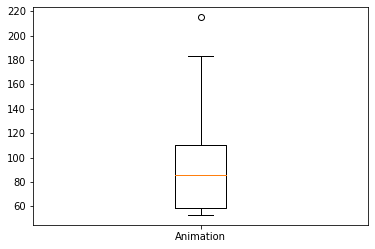

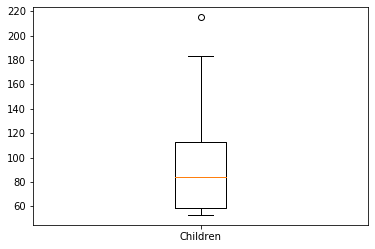

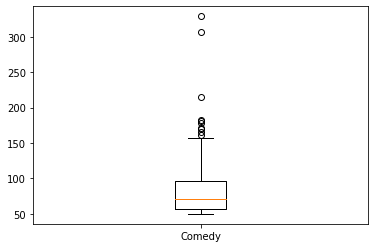

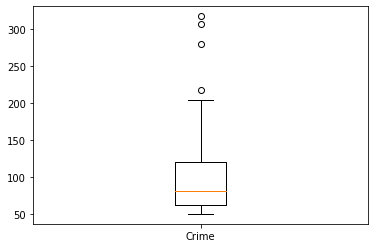

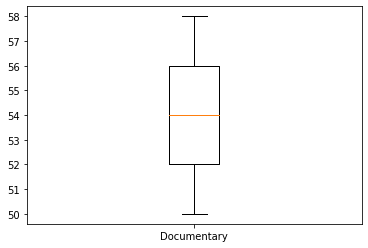

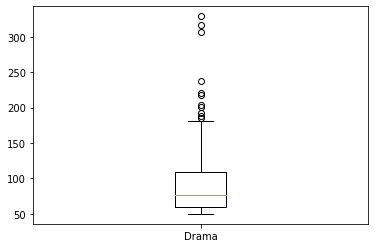

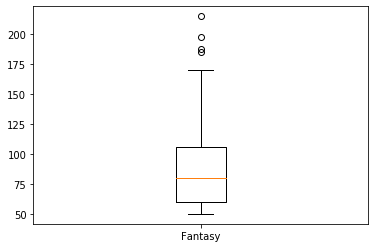

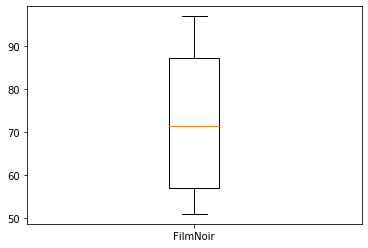

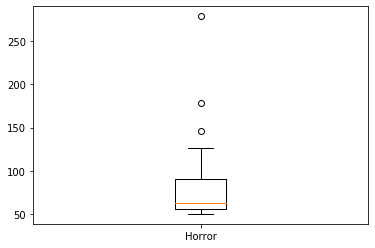

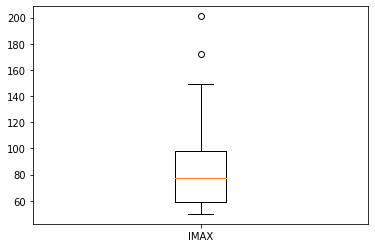

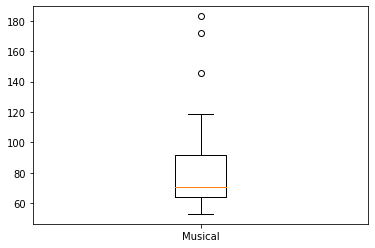

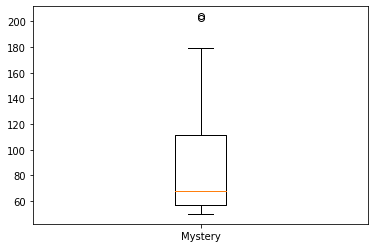

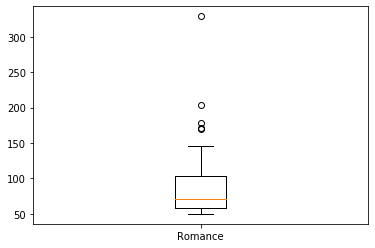

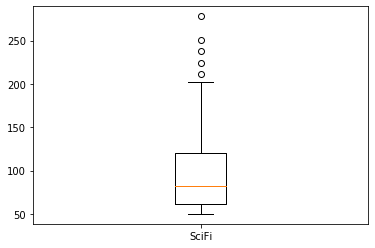

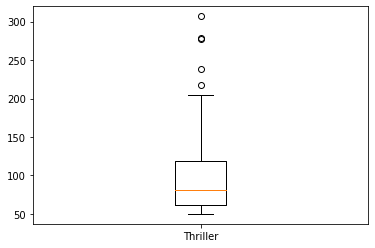

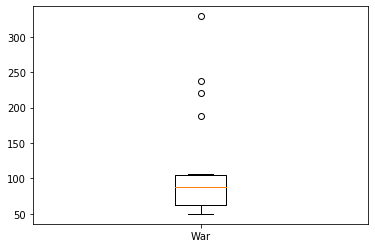

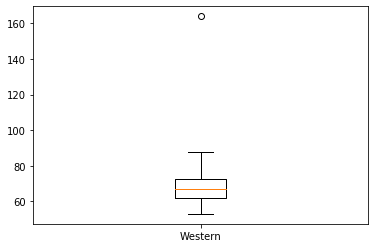

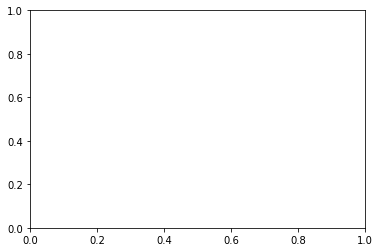

In [96]:
for x in generos.columns:
  ax.boxplot(votos_por_genero_por_filme[x].loc[votos_por_genero_por_filme[x] > 0], labels=[x])
  fig, ax = plt.subplots()
  
plt.show()

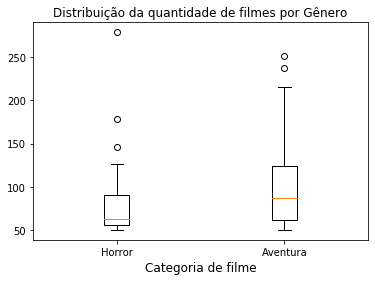

In [97]:
# solução:
Horror = votos_por_genero_por_filme.query("Horror > 0").Horror
Aventura = Acao = votos_por_genero_por_filme.query("Adventure > 0").Adventure
data = [Horror, Aventura]
fig, ax = plt.subplots()
ax.set_title('Distribuição da quantidade de filmes por Gênero')
ax.boxplot(data, labels=['Horror','Aventura'])
plt.xlabel("Categoria de filme", fontsize=12)
plt.show()

# Separei as categorias e fiz um filtro para votos > 0.

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Pela visualização de votos por filme, poderiamos escolher o filme de aventura, que parece ter uma distribuição com média maior do que o filme de horror.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, '')

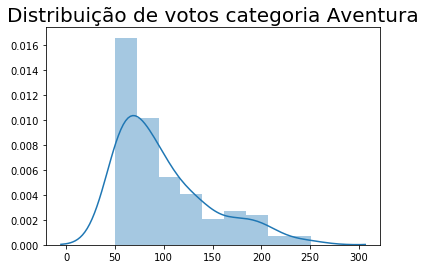

In [98]:
# solucao histograma de aventura
sns.distplot(votos_por_genero_por_filme.query("Adventure > 0").Adventure)
ax=ax
plt.title("Distribuição de votos categoria Aventura", fontsize=20)
plt.xlabel("")

Text(0.5, 0, '')

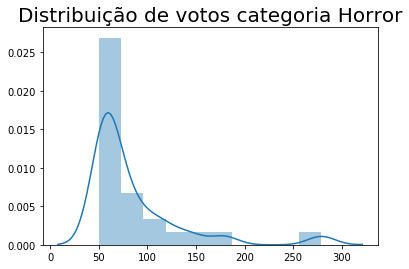

In [99]:
# solucao histograma de horror
sns.distplot(votos_por_genero_por_filme.query("Horror > 0").Horror)
ax=ax
plt.title("Distribuição de votos categoria Horror", fontsize=20)
plt.xlabel("")

In [100]:

from scipy import stats
hr = votos_por_genero_por_filme.query("Horror > 0").Horror
av = votos_por_genero_por_filme.query("Adventure > 0").Adventure
_, p_hr = stats.normaltest(hr)
_, p_av = stats.normaltest(av)
p_v = 0.05
print(f'p-value Horror: {p_hr}')
if p_hr < p_v:  #Vamos testar a hipotese nula de que as distribuições são normais. 
    print("Rejeitamos a Hipotese nula para p_hr, portanto não é uma distribuição normal")
else:
    print("É uma distribuição normal")
print(f'p-value Aventura: {p_av}')
if p_av < p_v:  #Vamos testar a hipotese nula de que as distribuições são normais. 
    print("Rejeitamos a Hipotese nula para p_av, portanto não é uma distribuição normal")
else:
    print("É uma distribuição normal")

p-value Horror: 1.2786148884334685e-07
Rejeitamos a Hipotese nula para p_hr, portanto não é uma distribuição normal
p-value Aventura: 5.987863006199139e-06
Rejeitamos a Hipotese nula para p_av, portanto não é uma distribuição normal


In [101]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import ranksums
from statsmodels.stats.weightstats import zconfint

print("Intervalo de confiança para Horror = ", zconfint(votos_por_genero_por_filme.query("Horror > 0").Horror))
print("Intervalo de confiança para Aventura = ", zconfint(votos_por_genero_por_filme.query("Adventure > 0").Adventure))

Intervalo de confiança para Horror =  (65.56072558734532, 104.82388979727007)
Intervalo de confiança para Aventura =  (91.35281882573622, 107.38960541668803)


In [102]:
from statsmodels.stats.weightstats import ztest

notas_horror = votos_por_genero_por_filme.query("Horror > 0").Horror
notas_aventura = votos_por_genero_por_filme.query("Adventure > 0").Adventure

# solução com o teste desejado
print (ranksums(notas_horror,notas_aventura ))

RanksumsResult(statistic=-1.9789320045004148, pvalue=0.04782366231999856)


### Solução (explique sua conclusão):

Pelos gráficos de distribuição podemos notar que ambos não se comportam de maneira normal.
Para confirmar nossa hipótese, testamos para a normalidade usando o normaltest para a hipotese h0 de serem uma distribuição normal. Ambas as amostras não foram consideradas normal tendo seus p_values < 0.05
Alem disso, comparamos as duas amostras apenas para entender como se comportam entre si.
Como as distribuições não são normais, utilizamos o teste ranksums, não paramétrico, para comparar as amostras, tendo como hipotese H0 que ambas as distribuições são iguais. 
Nosso p-valor neste caso foi de 0.0047 < 0.05, o que nos faz rejeitar a hipotese nula. Portanto dados suas médias, Aventura tem uma média de votos maior que Horror.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [103]:
subset_filmes = filmes[['nota_media','Horror','Adventure']]

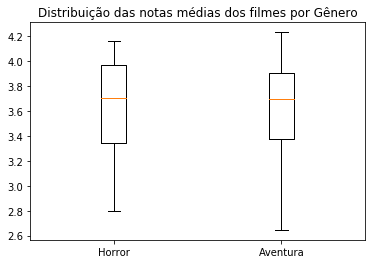

In [104]:
# solução:

Horror = subset_filmes.query("Horror > 0").nota_media
Aventura = subset_filmes.query("Adventure > 0").nota_media
data = [Horror, Aventura]
fig, ax = plt.subplots()
ax.set_title('Distribuição das notas médias dos filmes por Gênero')
ax.boxplot(data, labels=['Horror','Aventura'])

plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Visualmente, Horror parece um gênero com maior média de notas.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

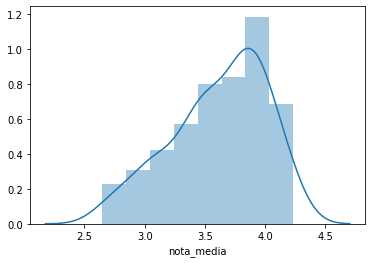

In [105]:
# solucao histograma de aventura
sns.distplot(Aventura)

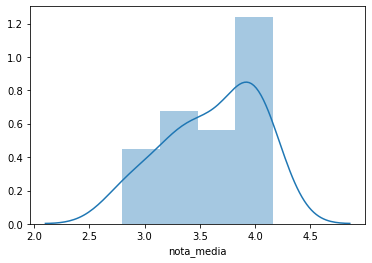

In [106]:
# solucao histograma de horror
sns.distplot(Horror)

In [107]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
hr = Horror
av = Aventura
_, p_hr = stats.normaltest(hr)
_, p_av = stats.normaltest(av)
p_v = 0.05
print(f'p-value Horror: {p_hr}')
if p_hr < p_v:  #Vamos testar a hipotese nula de que as distribuições são normais. 
    print("Rejeitamos a Hipotese nula para p_hr, portanto não é uma distribuição normal")
else:
    print("É uma distribuição normal")
print(f'p-value Aventura: {p_av}')
if p_av < p_v:  #Vamos testar a hipotese nula de que as distribuições são normais. 
    print("Rejeitamos a Hipotese nula para p_av, portanto não é uma distribuição normal")
else:
    print("É uma distribuição normal")
print("----------------------------------------------------------")
print("Intervalo de confiança para Horror = ", zconfint(Horror))
print("Intervalo de confiança para Aventura = ", zconfint(Aventura))


p-value Horror: 0.21186284682483916
É uma distribuição normal
p-value Aventura: 0.012835697582553224
Rejeitamos a Hipotese nula para p_av, portanto não é uma distribuição normal
----------------------------------------------------------
Intervalo de confiança para Horror =  (3.4493686603409324, 3.771684593062322)
Intervalo de confiança para Aventura =  (3.5484637855193895, 3.6822827530801248)


In [108]:
# solução com o teste desejado
print (ranksums(Horror, Aventura ))

RanksumsResult(statistic=0.2133682611487414, pvalue=0.8310397344212459)


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Utilizando o teste para as notas médias e percebemos que não podemos rejeitar H0 sendo a hipótese das distribuições terem as mesmas notas médias. Isso implica em não termos diferença entre as médias de notas dos filmes.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Escolheria Adventure, pois analisando os primeiros resultados, temos visualmente uma média maior. Mesmo que não consigamos diferencias as amostras das notas médias, notamos com os testes estatísticos que as quantidades de votos para aventura são maiores.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [109]:
votos_por_genero = filmes.loc[(filmes["Action"] == 1) | filmes["Drama"] == 1][['titulo','nota_media','total_de_votos']]
votos_por_genero

,titulo,nota_media,total_de_votos
filmeId,,,
6,Heat (1995),3.946078,102.0
10,GoldenEye (1995),3.496212,132.0
11,"American President, The (1995)",3.671429,70.0
16,Casino (1995),3.926829,82.0
17,Sense and Sensibility (1995),3.776119,67.0
...,...,...,...
106782,"Wolf of Wall Street, The (2013)",3.916667,54.0
109374,"Grand Budapest Hotel, The (2014)",3.778846,52.0
112852,Guardians of the Galaxy (2014),4.050847,59.0


In [110]:
# solução: calculando os 2 generos mais votados
#ja havia analisado isso em um tópico anterior
votos_por_genero_por_filme.sum().sort_values(ascending=False)[:2]

generos
Action    15734.0
Drama     15445.0
dtype: float64

In [111]:
# solução: encontrando os top 5 filmes desses generos
votos_por_genero.sort_values(by='nota_media', ascending=False)[:5]

,titulo,nota_media,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0
858,"Godfather, The (1972)",4.289062,192.0
2959,Fight Club (1999),4.272936,218.0
1276,Cool Hand Luke (1967),4.271930,57.0
1221,"Godfather: Part II, The (1974)",4.259690,129.0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [112]:
# solucao
print("Maior correlação:\n",filmes.corr()["nota_media"].sort_values(ascending=False)[2:4])
print("-----------------------")
print("Mmenor correlação:\n",filmes.corr()["nota_media"].sort_values(ascending=False)[len(filmes.corr()["nota_media"])-4:len(filmes.corr()["nota_media"])-2])

Maior correlação:
 Drama    0.277662
Crime    0.190220
Name: nota_media, dtype: float64
-----------------------
Mmenor correlação:
 SciFi    -0.136717
Action   -0.154089
Name: nota_media, dtype: float64


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [113]:
# solucao
print("Maior correlação:\n",filmes.corr()["total_de_votos"].sort_values(ascending=False)[2:4])
print("-----------------------")
print("Mmenor correlação:\n",filmes.corr()["total_de_votos"].sort_values(ascending=False)[len(filmes.corr()["total_de_votos"])-4:len(filmes.corr()["total_de_votos"])-2])

Maior correlação:
 Adventure    0.104380
War          0.087999
Name: total_de_votos, dtype: float64
-----------------------
Mmenor correlação:
 Romance       -0.045427
Documentary   -0.055010
Name: total_de_votos, dtype: float64


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0, 0.5, 'Nota média dos filmes')

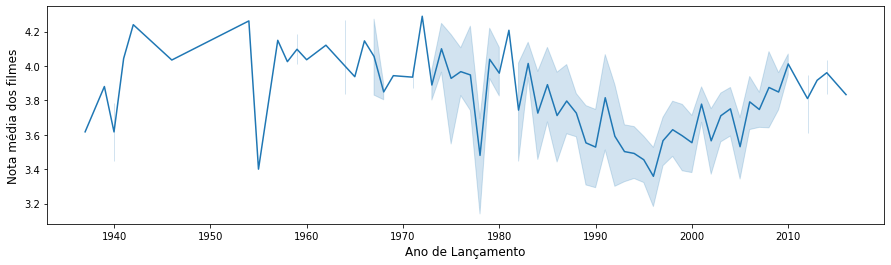

In [114]:
# solucao
plt.figure(figsize=(15,4))
sns.lineplot(x="ano_de_lancamento",y="nota_media",data=filmes)
plt.xlabel('Ano de Lançamento', fontsize = 12)
plt.ylabel('Nota média dos filmes', fontsize = 12)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [115]:
# solução (código)
filmes.corr()

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
ano_de_lancamento,1.000000,-0.159146,-0.028709,0.140392,0.114268,-0.052874,-0.149019,0.019272,0.060993,0.047746,...,0.002235,-0.026873,0.248002,-0.296174,0.005591,-0.024589,0.069839,0.104458,0.026118,-0.062539
nota_media,-0.159146,1.000000,0.342584,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,...,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
total_de_votos,-0.028709,0.342584,1.000000,0.066239,0.104380,0.023442,0.001764,-0.128527,0.079766,-0.055010,...,-0.039408,-0.036132,-0.016285,-0.024741,-0.007051,-0.045427,0.063802,0.085525,0.087999,-0.060789
Action,0.140392,-0.154089,0.066239,1.000000,0.333591,-0.173589,-0.213311,-0.291578,0.061890,-0.050596,...,-0.022520,-0.009411,0.129896,-0.145649,-0.063915,-0.200278,0.325969,0.311401,0.070618,0.046621
Adventure,0.114268,-0.079985,0.104380,0.333591,1.000000,0.163576,0.178956,-0.090515,-0.241256,-0.043048,...,-0.061015,-0.096786,0.217954,-0.049984,-0.090344,-0.173745,0.278520,-0.005431,-0.086730,0.044838
Animation,-0.052874,0.043071,0.023442,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,...,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Children,-0.149019,-0.030360,0.001764,-0.213311,0.178956,0.753654,1.000000,0.119962,-0.130389,-0.022818,...,-0.032341,-0.084567,0.092512,0.406724,-0.077583,-0.016294,-0.101054,-0.207105,-0.071703,-0.056526
Comedy,0.019272,-0.256005,-0.128527,-0.291578,-0.090515,0.125706,0.119962,1.000000,-0.126158,0.013323,...,-0.077683,-0.028315,-0.155010,0.054861,-0.200222,0.229377,-0.213558,-0.364583,-0.082082,0.004876
Crime,0.060993,0.190220,0.079766,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,...,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Documentary,0.047746,-0.003486,-0.055010,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,...,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059


### Solução (explicação)

Correlação de -0.16
Neste caso, a coleta de dados pode viesar os votos dos filmes, com isso não conseguimos definir se o ano em que o filme foi lançado tem correlação com a sua nota.
Outra análise pertinente é o conhecimento das variáveis para entender que não existe causalidade entre as variáveis.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

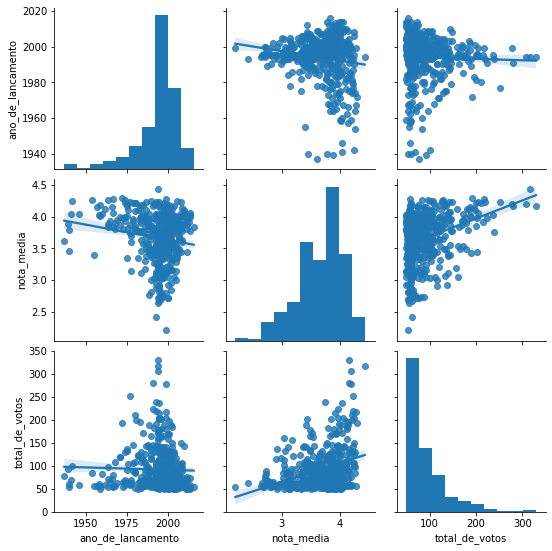

In [116]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
sns.pairplot(infos, kind="reg")

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [117]:
filmes ['tier'] = \
        np.where((filmes.Animation == 1), 'Animation', 'Others')

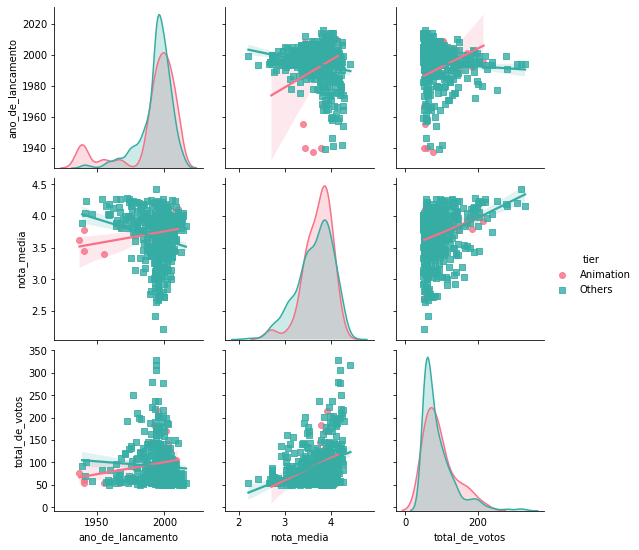

In [118]:
anim = filmes[['ano_de_lancamento','nota_media','total_de_votos','tier']]
sns.pairplot(anim, kind="reg", hue="tier", palette="husl",  markers=["o", "s"] )


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

In [119]:
print(anim.loc[anim['tier'] == "Animation"].corr())
print(len(anim.loc[anim['tier'] == "Animation"]))

                   ano_de_lancamento  nota_media  total_de_votos
ano_de_lancamento           1.000000    0.257450        0.252803
nota_media                  0.257450    1.000000        0.342205
total_de_votos              0.252803    0.342205        1.000000
32


In [120]:
print(anim.loc[anim['tier'] != "Animation"].corr())
print(len(anim.loc[anim['tier'] != "Animation"]))

                   ano_de_lancamento  nota_media  total_de_votos
ano_de_lancamento           1.000000   -0.203418       -0.061979
nota_media                 -0.203418    1.000000        0.342297
total_de_votos             -0.061979    0.342297        1.000000
418


### Solução:

|Comparativamente com os outros filmes, animação parece ter uma correlação linear entre os filmes mais novos e melhores notas/total de votos.

Podemos inferir que com o passo do tempo as animações tem melhorado de qualidade, assim como atingido um maior publico.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Vamos apenas plotar um heatmap para tentar um olhar mais preciso sobre as correlações das variáveis

In [121]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,tier
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Animation
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Others
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Others
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,Others
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Others


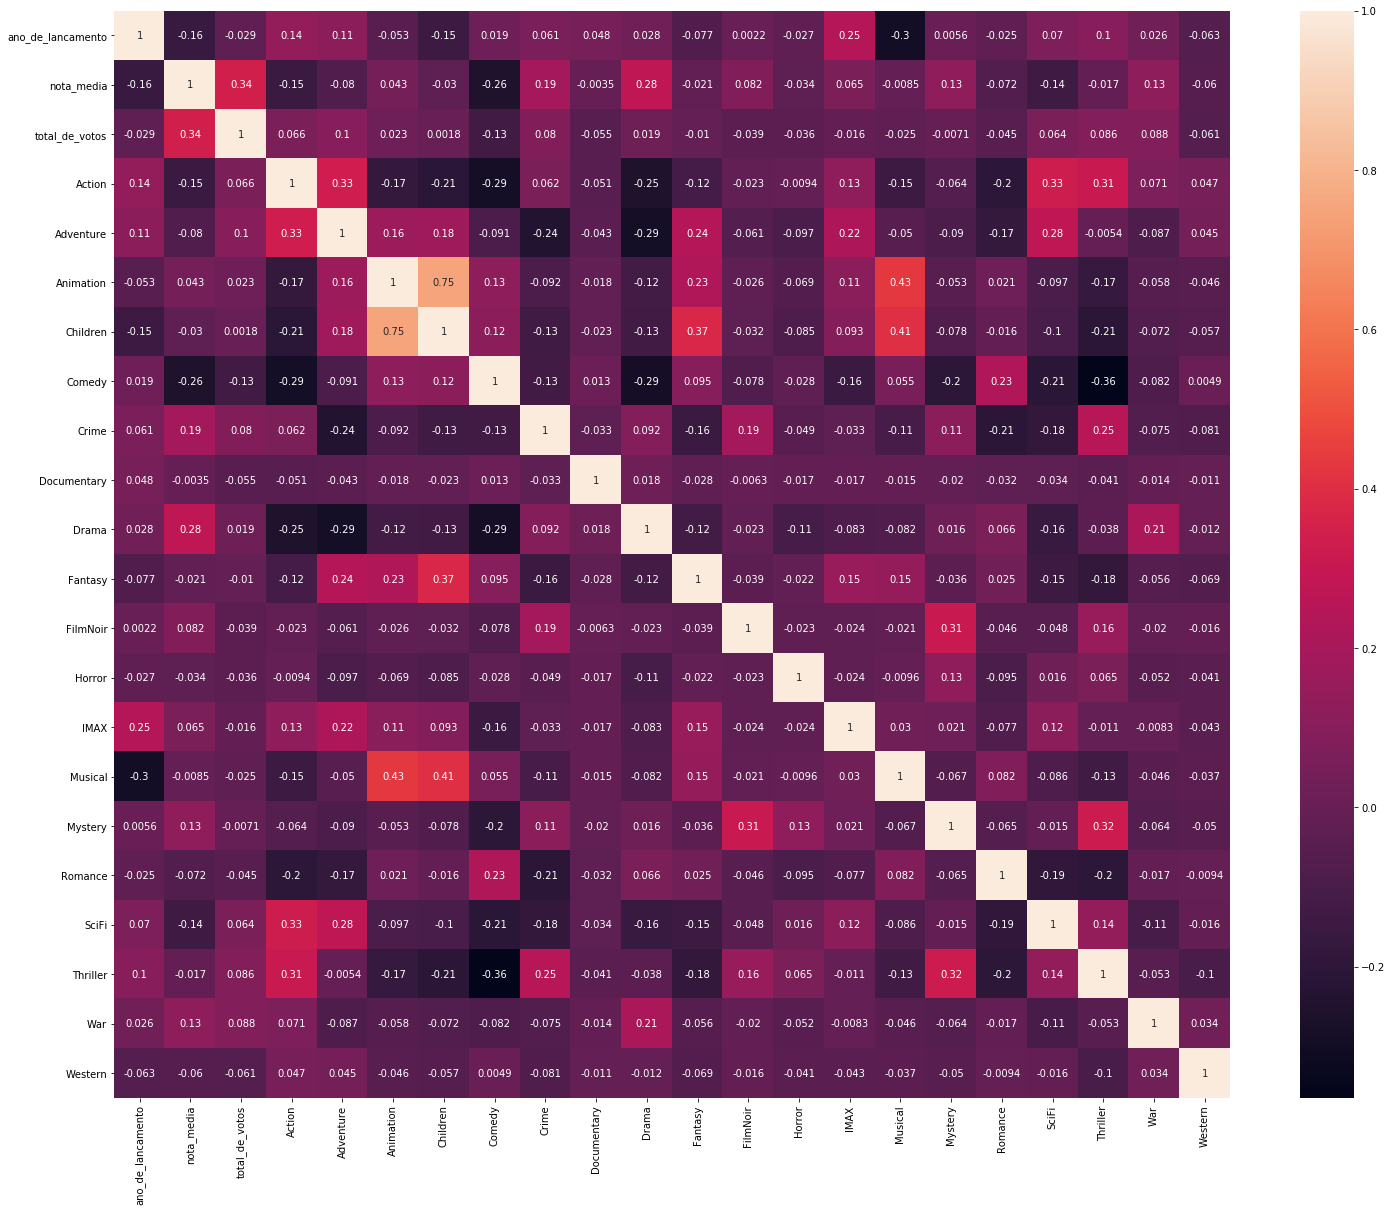

In [122]:
# solução
plt.figure(figsize=(25,20))
sns.heatmap(filmes.corr(), annot=True)


Text(0.5, 1.0, 'Total de Votos por nota Média')

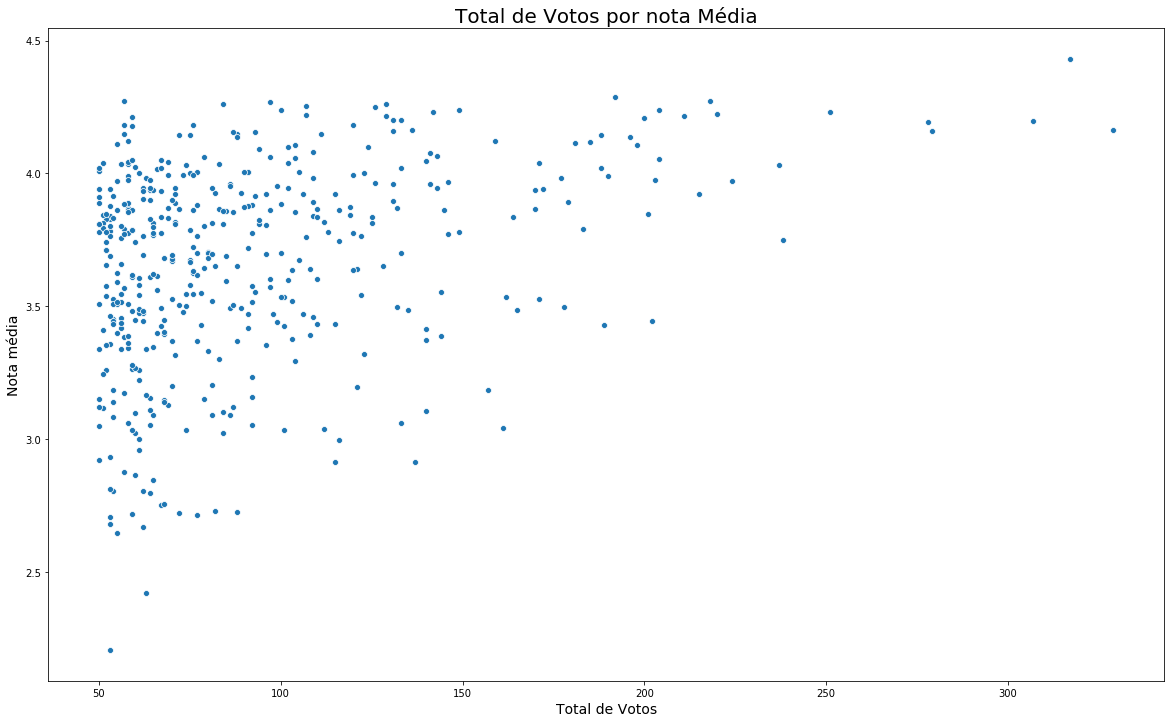

In [168]:
plt.figure(figsize=(20,12))
sns.scatterplot(x="total_de_votos",y="nota_media",data = filmes)

#fig.update_layout(title='Quantidade de filmes por Ano de Lançamento')
#fig.show()
plt.xlabel('Total de Votos', fontsize = 14)
plt.ylabel('Nota média', fontsize = 14)
plt.title('Total de Votos por nota Média', fontsize = 20)


Podemos notar uma certa tendência sobre as média de notas dos filmes e o total de votos que eles receberam. A tendência indica que filmes com <b> mais votos </b> parecem ter uma nota média <b> maior </b>, essa tendência é <b>fraca</b>.

Text(0, 0.5, 'Total de Votos')

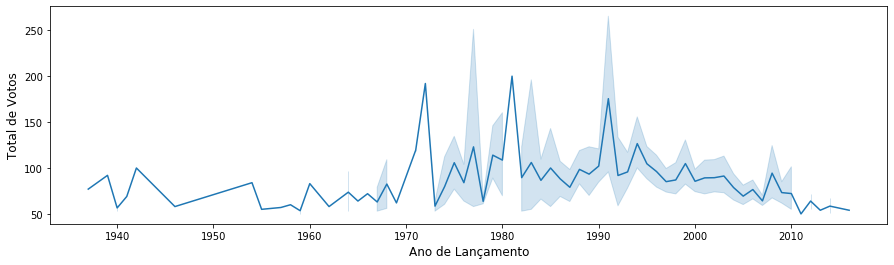

In [124]:
# solucao
plt.figure(figsize=(15,4))
sns.lineplot(x="ano_de_lancamento",y="total_de_votos", data=filmes)
plt.xlabel('Ano de Lançamento', fontsize = 12)
plt.ylabel('Total de Votos', fontsize = 12)

Em contrapartida, podemos ver que os filmes que tiveram seu lança,ento entre <b> 1970 </b> e <b> 2010 </b> parecem ter uma variabilidade maior de quantidade de votos, existem filmes com muitos mais votos que a média geral. Vamos analisar os boxplot desses casos.

Text(0, 0.5, 'Total de Votos')

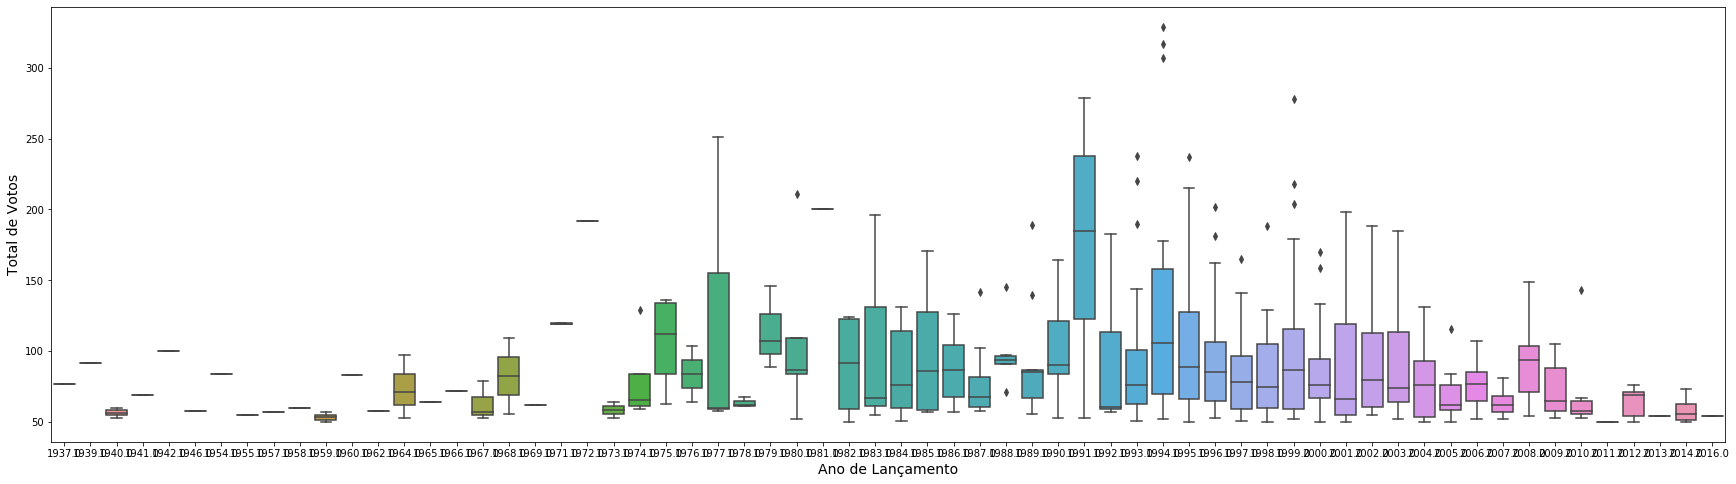

In [125]:
plt.figure(figsize=(30,8))
sns.boxplot(x="ano_de_lancamento", y="total_de_votos", data=filmes)
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Total de Votos', fontsize = 14)

Podemos notar que as quantidades de votos dos filmes lançados em <b>1991</b> são maiores que os demais anos, vamos analisar as médias de notas também.

Text(0, 0.5, 'Nota Média')

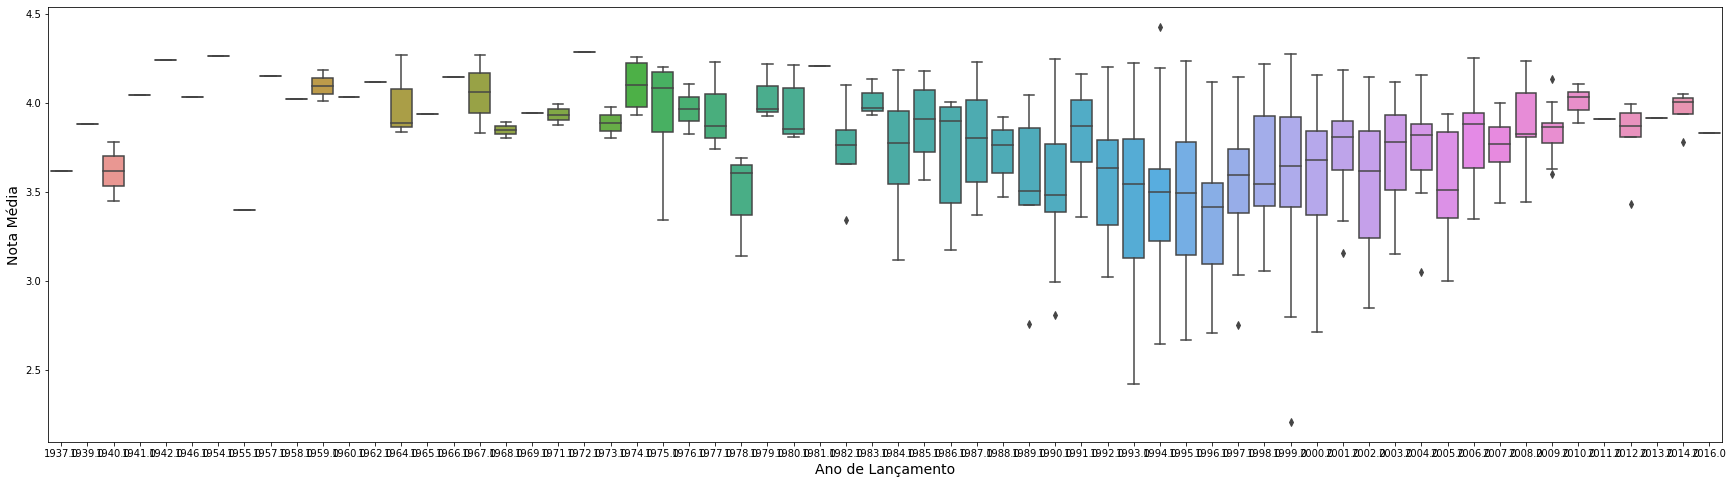

In [126]:
plt.figure(figsize=(30,8))
sns.boxplot(x="ano_de_lancamento", y="nota_media", data=filmes)
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Nota Média', fontsize = 14)

In [140]:
filmes ['tier2'] = \
        np.where((filmes.Action == 1), 'Action', 'Others')

In [146]:
teste_action = filmes.groupby(['ano_de_lancamento','tier2']).count()['titulo'].reset_index()
teste_action

,ano_de_lancamento,tier2,titulo
0,1937.0,Others,1
1,1939.0,Others,1
2,1940.0,Others,2
3,1941.0,Others,1
4,1942.0,Others,1
...,...,...,...
97,2012.0,Action,5
98,2013.0,Others,1
99,2014.0,Action,1
100,2014.0,Others,3


Text(0, 0.5, 'Quantidade de Filmes')

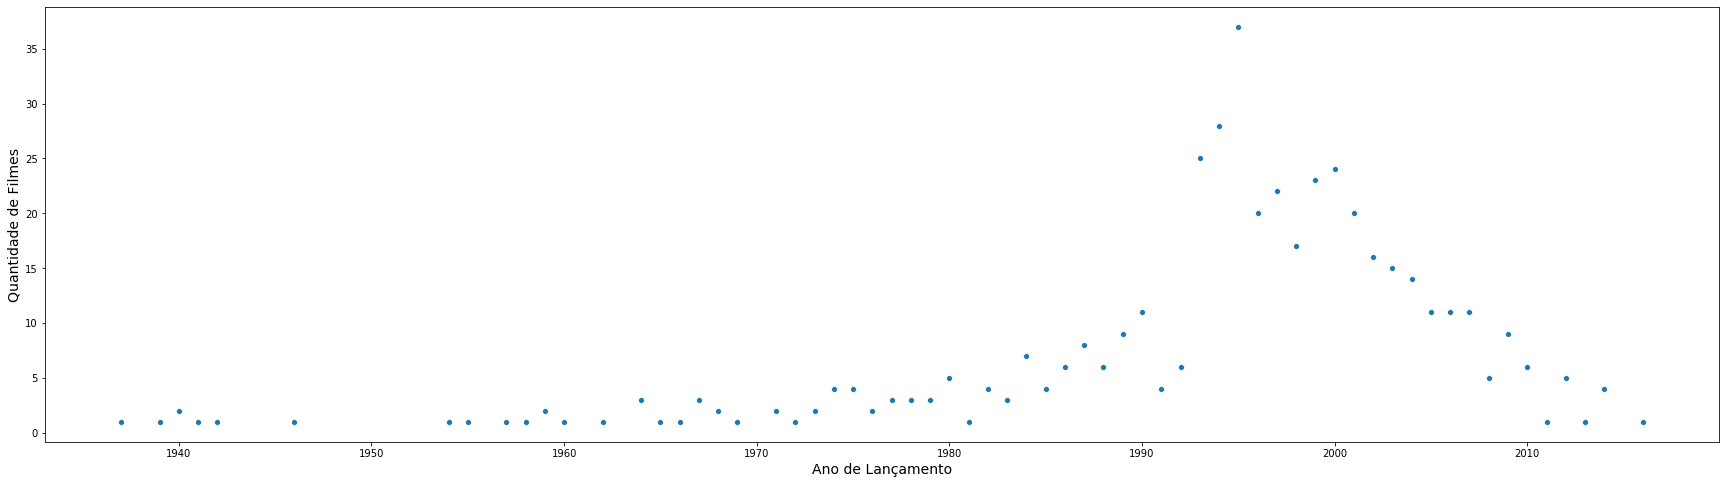

In [164]:
plt.figure(figsize=(30,8))
sns.scatterplot(x='ano_de_lancamento', y='titulo',data = quantidade_ano)

#fig.update_layout(title='Quantidade de filmes por Ano de Lançamento')
#fig.show()
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Quantidade de Filmes', fontsize = 14)


Text(0, 0.5, 'Total de Votos')

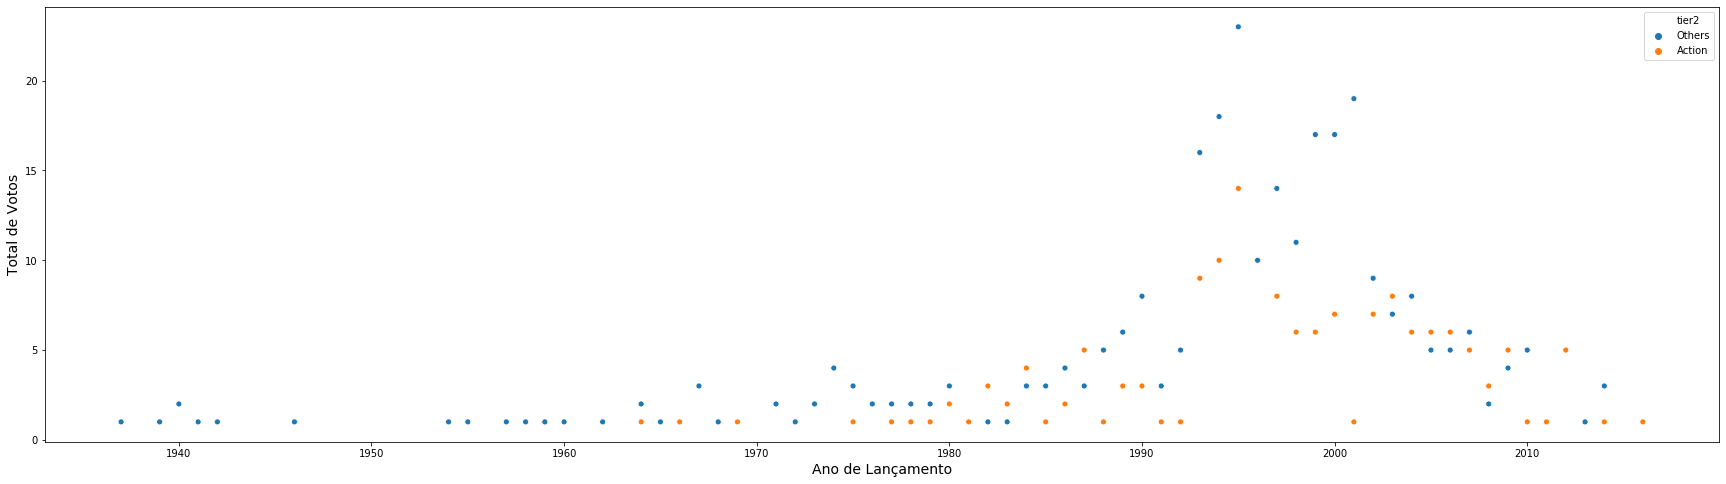

In [154]:
plt.figure(figsize=(30,8))
sns.scatterplot(x="ano_de_lancamento", y="titulo", hue='tier2', data=teste_action)
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Total de Votos', fontsize = 14)

Nesta distribuição podemos ver que as notas médias dos filmes da <b>década de 90</b> sçao piores que os demais anos. Isso acontece mesmo tendo mais votos do que os demais, o que refuta nossa primeira conclusão. Talves esses filmes sejam realmente muito assistidos, mas tem uma nota pior do que os demais. 
Mas quantos filmes representam essas décadas?

In [127]:
quantidade_ano = filmes.groupby('ano_de_lancamento').count()['titulo'].reset_index()

Diferente do que imaginávamos, a quantidade de filmes lançados é maior dujrante a <b>a década de 90 </b>, isso faz com que a variabilidade dos votos seja maior durante esse período

In [133]:
resumo_filmes = quantidade_ano.merge(filmes.groupby('ano_de_lancamento').sum()['total_de_votos'].reset_index(), on='ano_de_lancamento', how='inner')
resumo_filmes['media_votos'] = resumo_filmes.total_de_votos/resumo_filmes.titulo
resumo_filmes

,ano_de_lancamento,titulo,total_de_votos,media_votos
0,1937.0,1,77.0,77.0
1,1939.0,1,92.0,92.0
2,1940.0,2,113.0,56.5
3,1941.0,1,69.0,69.0
4,1942.0,1,100.0,100.0
...,...,...,...,...
59,2011.0,1,50.0,50.0
60,2012.0,5,320.0,64.0
61,2013.0,1,54.0,54.0
62,2014.0,4,234.0,58.5


Text(0, 0.5, 'Média de Votos')

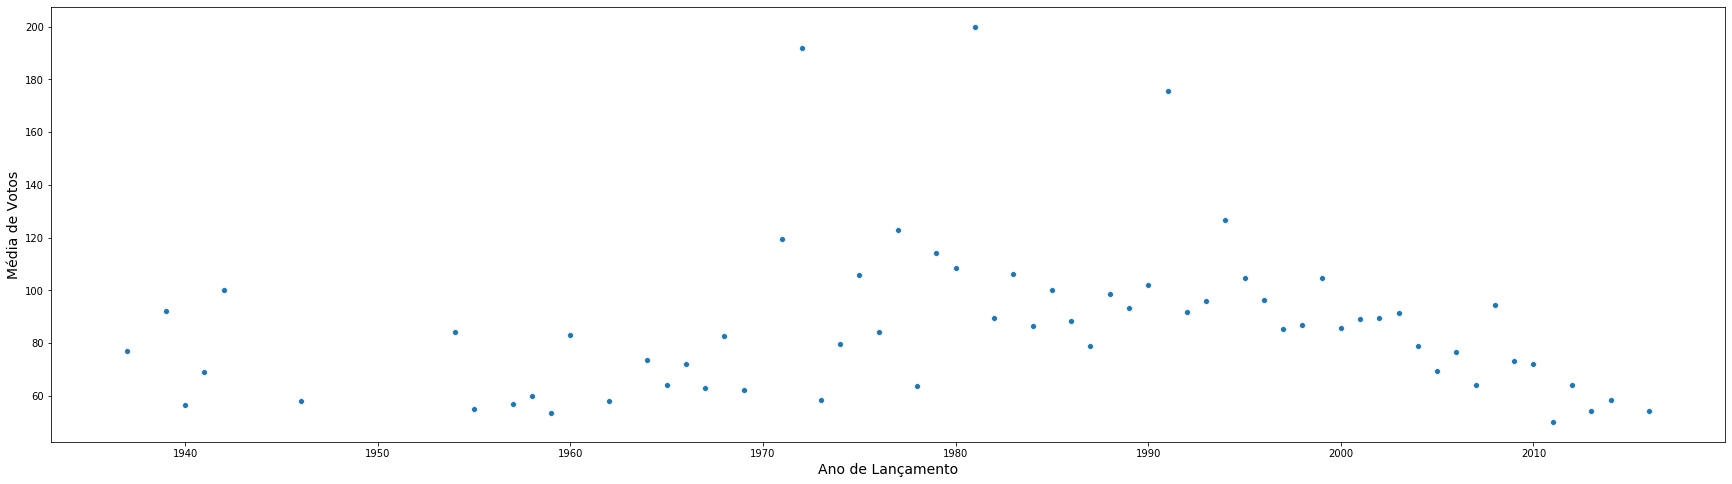

In [165]:
plt.figure(figsize=(30,8))
sns.scatterplot( x='ano_de_lancamento', y='media_votos', data=resumo_filmes)
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Média de Votos', fontsize = 14)


A média de votos dos filmes nos anos 90 parece maior que a dos demais anos.